## **Dataset Exploration***
In the following we will analyse the dataset used for our research. This allows proper pre-processing and a sound research design enabling meaningful insights. 
The primary aim is to understand the structure of each dataset, which allows us to unify them to construct the final dataset, and to analyze the data distribution and characteristics, which enables efficient sampling. 

The dataset used for our research are: FinQA, ConFinQA, and FinDER.


In [1]:
# import all relevant libraries
import json
import random
import os

### **1. First Dataset Insepection**

**Load and Inspect the Samples**

In [2]:
# Import necessary libraries
import sys
sys.path.append('../src')
import json
from pathlib import Path
# For better display in notebooks
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### FinQA

In [3]:
import json
from pathlib import Path

finQA_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/FinQA-main/dataset/train.json")
with open(finQA_train_file, 'r') as f:
    finQA_train_data = json.load(f)

print(f"Loaded {len(finQA_train_data)} training examples")
print(f"Data type: {type(finQA_train_data)}")

Loaded 6251 training examples
Data type: <class 'list'>


In [4]:
# Inspect the structure of the first sample
finQA_first_sample = finQA_train_data[0]
print(f"Sample type: {type(finQA_first_sample)}")
print(f"Sample keys: {list(finQA_first_sample.keys())}")
print(f"Number of keys: {len(finQA_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'table_retrieved', 'text_retrieved', 'table_retrieved_all', 'text_retrieved_all']
Number of keys: 11


In [5]:
print(finQA_first_sample)

{'pre_text': ['interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) .', 'if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million .', 'foreign currency exposure as more fully described in note 2i .', 'in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s .', 'dollar-based exposures by entering into forward foreign currency exchange contracts .', 'the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months .', 'currently , our largest foreign currency exposure is the euro , primarily because our european operations have the highest proportion of our local currency denominated expenses .', 'relative to foreign currency exposures existing at october 31 , 2009 and november 1 , 2008 , a 10% ( 10 % )

In [6]:
# Detailed inspection of the first sample
for key, value in finQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 pre_text:
   Type: list (length: 15)
   First item type: <class 'str'>

📋 post_text:
   Type: list (length: 35)
   First item type: <class 'str'>

📋 filename:
   Type: string (length: 20)
   Preview: ADI/2009/page_49.pdf

📋 table_ori:
   Type: list (length: 4)
   First item type: <class 'list'>

📋 table:
   Type: list (length: 4)
   First item type: <class 'list'>

📋 qa:
   Type: dict (keys: ['question', 'answer', 'explanation', 'ann_table_rows', 'ann_text_rows', 'steps', 'program', 'gold_inds', 'exe_ans', 'tfidftopn', 'program_re', 'model_input'])

📋 id:
   Type: string (length: 22)
   Preview: ADI/2009/page_49.pdf-1

📋 table_retrieved:
   Type: list (length: 2)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 text_retrieved:
   Type: list (length: 3)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 table_retrieved_all:
   Type: list (length: 4)
   First item type: <class 'dict'>
   First item keys: ['score', 'ind']

📋 text_retrie

**FinQA: Each training example is a dictionary with 11 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "explenation": Optional human-written explanation for the answer (often empty in FinQA)<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the gold execution result;<br>
  "tfidftopn": Top-n retrieved text chunks using TF-IDF baseline.<br>
  "program_re": the reasoning program in nested format;<br>
  "model_input": A list of text chunks (tuples of text ID and content) used as input to the model.<br>
}<br>
"id": unique example id. <br>
"table_retrieved": A list of tables retrieved by a retriever model (e.g., BM25, DPR), each with a similarity score and ind (identifier).<br>
"text_retrieved": A list of retrieved text passages (usually from pre_text + post_text), sorted by similarity score.<br>
"table_retrieved_all": A complete list of table candidates along with their retrieval scores.<br>
"text_retrieved_all": All candidate text chunks (with scores), potentially from the whole document, ranked by relevance.<br>

#### ConvFinQA

In [7]:
print(os.listdir("/Users/christel/Desktop/Thesis/thesis_repo/data/ConvFinQA-main"))

['.DS_Store', 'LICENSE', 'code', 'README.md', 'data']


In [8]:
ConvfinQA_turn_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/ConvFinQA-main/data/train_turn.json")
with open(ConvfinQA_turn_train_file, 'r') as f:
    ConvfinQA_turn_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_turn_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_turn_train_data)}")

Loaded 11104 training examples
Data type: <class 'list'>


In [9]:
ConvfinQA_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/ConvFinQA-main/data/train.json")
with open(ConvfinQA_train_file, 'r') as f:
    ConvfinQA_train_data = json.load(f)

print(f"Loaded {len(ConvfinQA_train_data)} training examples")
print(f"Data type: {type(ConvfinQA_train_data)}")

Loaded 3037 training examples
Data type: <class 'list'>


In [10]:
for i, sample in enumerate(ConvfinQA_turn_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)



Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 2: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 3: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 4: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']


In [11]:
for i, sample in enumerate(ConvfinQA_train_data[:5]):
    dialogue = sample.get("annotation", {}).get("dialogue_break", [])
    print(f"\nSample {i}: Dialogue length = {len(dialogue)}")
    print(dialogue)


Sample 0: Dialogue length = 4
['what is the net cash from operating activities in 2009?', 'what about in 2008?', 'what is the difference?', 'what percentage change does this represent?']

Sample 1: Dialogue length = 4
['what were revenues in 2008?', 'what were they in 2007?', 'what was the net change?', 'what is the percent change?']

Sample 2: Dialogue length = 4
['what was the total of net sales in 2001?', 'and what was that in 2000?', 'what was, then, the change in the total of net sales over the year?', 'and how much does this change represent in relation to that total in 2000, in percentage?']

Sample 3: Dialogue length = 6
['what was the change in the performance of the united parcel service inc . from 2004 to 2009?', 'and how much does this change represent in relation to that performance in 2004, in percentage?', 'what was the performance value of the s&p 500 index in 2009?', 'what was, then, the change in that performance from 2004 to 2009?', 'and how much does this change re

**train.json (Conversation-Level Format):** <br>
Each entry in this file represents a full multi-turn dialogue between a user and a system. It contains multiple interrelated QA pairs (dialogue_break) that often require the model to reason across dialogue history. This format is ideal for training and evaluating systems designed to handle conversational memory and context-aware reasoning.<br>
**train_turn.json (Turn-Level Format):**<br>
This version contains individual QA pairs, each treated as an independent training instance. While each turn includes metadata about the full dialogue (e.g., dialogue_break, turn_program), the structure is flattened to focus on single-turn question answering. It aligns closely with traditional QA datasets like FinQA and FinDER.<br>


The evaluation requires a unified dataset format that:<br>

- Ensures consistency across multiple QA datasets (FinQA, FinDER, ConvFinQA),
- Supports scalable benchmarking without additional engineering overhead,
- Enables clean input-output tracking across different RAG pipelines.<br>

The turn-level format (train_turn.json) satisfies these requirements by providing structurally uniform, self-contained QA pairs that are directly comparable to FinQA and FinDER. This consistency allows for streamlined preprocessing, batching, and evaluation across all models and datasets.<br>

Additionally, using the turn-level format avoids the added complexity of reconstructing dialogue context or implementing query-rewriting logic—an important consideration given the limited timeline of the project.<br>

To still account for conversational realism, a small subset of context-dependent examples from train.json may be used in a complementary analysis, providing qualitative insights into retriever performance under dialogue-aware conditions.<br>

In [12]:
# Inspect the structure of the first sample
ConvfinQA_first_sample = ConvfinQA_turn_train_data[0]
print(f"Sample type: {type(ConvfinQA_first_sample)}")
print(f"Sample keys: {list(ConvfinQA_first_sample.keys())}")
print(f"Number of keys: {len(ConvfinQA_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['pre_text', 'post_text', 'filename', 'table_ori', 'table', 'qa', 'id', 'annotation']
Number of keys: 8


In [13]:
print(ConvfinQA_first_sample)

{'pre_text': ['26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 .', 'all revenue components within the segment experienced growth during fiscal 2008 .', 'license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .', 'support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support .', 'gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which carries the highest margins .', 'liquidity and capital resources we have historically generated positive cash flow from operations and have generally used funds generated from operations and short

In [14]:
# Detailed inspection of the first sample
for key, value in ConvfinQA_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 pre_text:
   Type: list (length: 9)
   First item type: <class 'str'>

📋 post_text:
   Type: list (length: 15)
   First item type: <class 'str'>

📋 filename:
   Type: string (length: 21)
   Preview: JKHY/2009/page_28.pdf

📋 table_ori:
   Type: list (length: 8)
   First item type: <class 'list'>

📋 table:
   Type: list (length: 7)
   First item type: <class 'list'>

📋 qa:
   Type: dict (keys: ['question', 'answer', 'explanation', 'ann_table_rows', 'ann_text_rows', 'steps', 'program', 'gold_inds', 'exe_ans', 'program_re'])

📋 id:
   Type: string (length: 32)
   Preview: Single_JKHY/2009/page_28.pdf-3_0

📋 annotation:
   Type: dict (keys: ['amt_table', 'amt_pre_text', 'amt_post_text', 'original_program', 'step_list', 'answer_list', 'dialogue_break', 'turn_program_ori', 'dialogue_break_ori', 'turn_program', 'qa_split', 'exe_ans_list', 'cur_program', 'cur_dial', 'exe_ans', 'cur_type', 'turn_ind', 'gold_ind'])


**ConvFinQA: Each training example is a dictionary with 8 keys:** <br>
"pre_text": the texts before the table; <br>
"post_text": the text after the table;<br>
"filename": name of the pdf file <br>
"table_ori": The original version of the table, as extracted from the document, before any preprocessing or normalization.<br>
"table": the table;<br>
"qa": {<br>
  "question": the question;<br>
  "answer": The final numeric/textual answer to the question.<br>
  "ann_table_rows": Indices of table rows that are annotated as relevant (if the answer comes from a table).<br>
  "ann_text_rows": Indices of relevant text passages (e.g., [1] refers to text_1) from model_input.<br>
  "steps" ("op": operation, "arg1; arg2": operands; "res": result of the operation:  The symbolic execution steps used to compute the answer.<br>
  "program": the reasoning program;<br>
  "gold_inds": the gold supporting facts;<br>
  "exe_ans": the execution results of each question turn. ;<br>
}<br>
"id": unique example id. <br>
"annotation": {<br>
  "original_program": original FinQA question;<br>
  "dialogue_break": the conversation, as a list of question turns. <br>
  "turn_program": the ground truth program for each question, corresponding to the list in "dialogue_break".<br>
  "cur_pogram":Current program for this turn.<br>
  "cur_dial":Current dialogue turn.<br>
  "gold_ind": Highlighted content for evidence.<br>
  "turn_ind": Index of this turn in the full dialogue.<br>
  "exe_ans_list": the execution results of each question turn. <br>
}<br>

#### FinDER

In [15]:
import json
from pathlib import Path

finder_train_file = Path("/Users/christel/Desktop/Thesis/thesis_repo/data/FinDER/train.jsonl")
finder_train_data = []
with open(finder_train_file, 'r') as f:
    for line in f:
        finder_train_data.append(json.loads(line))

print(f"Loaded {len(finder_train_data)} training examples")
print(f"Data type: {type(finder_train_data)}")

Loaded 5703 training examples
Data type: <class 'list'>


In [16]:
# Inspect the structure of the first sample
finder_first_sample = finder_train_data[0]
print(f"Sample type: {type(finder_first_sample)}")
print(f"Sample keys: {list(finder_first_sample.keys())}")
print(f"Number of keys: {len(finder_first_sample.keys())}")

Sample type: <class 'dict'>
Sample keys: ['_id', 'text', 'reasoning', 'category', 'references', 'answer', 'type']
Number of keys: 7


In [17]:
print(finder_train_data[0])

{'_id': 'b33fcee7', 'text': 'Delta in CBOE Data & Access Solutions rev from 2021-23.', 'reasoning': True, 'category': 'Financials', 'references': ['Cboe Global Markets, Inc. and Subsidiaries\n\nConsolidated Statements of Income\n\nYears ended December 31, 2023, 2022, and 2021\n\n(In millions, except per share data)\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n2023\n\n    \n\n2022\n\n    \n\n2021\n\n \n\nRevenues:\n\n\n\n\n\n\n\n\n\n\n\nCash and spot markets\n\n\n$\n\n1,445.1\n\n\n$\n\n1,777.6\n\n\n$\n\n1,660.5\n\n\nData and access solutions\n\n\n\n539.2\n\n\n\n497.0\n\n\n\n427.7\n\n\nDerivatives markets\n\n\n \n\n1,789.2\n\n\n \n\n1,683.9\n\n\n \n\n1,406.6\n\n\nTotal revenues\n\n\n \n\n3,773.5\n\n\n \n\n3,958.5\n\n\n \n\n3,494.8\n\n\nCost of revenues:\n\n\n\n\n\n\n\n\n\n\n\n  Liquidity payments\n\n\n \n\n1,385.8\n\n\n \n\n1,670.2\n\n\n \n\n1,650.7\n\n\n  Routing and clearing\n\n\n\n79.1\n\n\n\n83.2\n\n\n\n87.8\n\n\n  Section 31 fees\n\n\n\n185.7\n\n\n\n329.8\n\n\n\n179.6\n\n\n  Royalty fees an

In [18]:
# Detailed inspection of the first sample
for key, value in finder_first_sample.items():
    print(f"\n📋 {key}:")
    if isinstance(value, str):
        print(f"   Type: string (length: {len(value)})")
        print(f"   Preview: {value[:100]}{'...' if len(value) > 100 else ''}")
    elif isinstance(value, list):
        print(f"   Type: list (length: {len(value)})")
        if len(value) > 0:
            print(f"   First item type: {type(value[0])}")
            if isinstance(value[0], dict):
                print(f"   First item keys: {list(value[0].keys())}")
    elif isinstance(value, dict):
        print(f"   Type: dict (keys: {list(value.keys())})")
    else:
        print(f"   Type: {type(value)}")
        print(f"   Value: {value}")


📋 _id:
   Type: string (length: 8)
   Preview: b33fcee7

📋 text:
   Type: string (length: 55)
   Preview: Delta in CBOE Data & Access Solutions rev from 2021-23.

📋 reasoning:
   Type: <class 'bool'>
   Value: True

📋 category:
   Type: string (length: 10)
   Preview: Financials

📋 references:
   Type: list (length: 1)
   First item type: <class 'str'>

📋 answer:
   Type: string (length: 133)
   Preview: The Data and Access Solutions revenue increased by $111.5 million from 2021 to 2023, calculated as 5...

📋 type:
   Type: string (length: 8)
   Preview: Subtract


**FinDER: Each training example is a dictionary with 7 keys:** <br>
"id": unique identifier.<br>
"text": query that the model is expected to answer.<br>
"reasoning": ndicates whether the question requires reasoning (e.g. logical inference, arithmetic operations) rather than simple lookup. true = reasoning required.<br>
"category": The semantic category of the question (e.g., Financials, Company overview, Footnotes, etc.).<br>
"references": The source text passages (e.g., extracted from tables or footnotes) that the model should consider when answering the question. <br>
"answer": The reference answer that the model should produce.<br>
"types": Indicates the type of reasoning required to arrive at the answer. <br>


### **2. Construct the final dataset**<br>
Since the original datasets are of varying structures we will in the following create a canonical schema to avoid confounds and log identical signals across runs. It'll contain only the fields that are relevant for retrieval, answer checking , and analysis. The goal is to construct a dataset where each row can be fed straight into the each of the RAG models with no dataset-specific branches. <br>



The final dataset has the following structure: <br>

{
  "qid"          : "string",     // dataset-prefix + original id <br>
  "dataset"      : "FinQA | ConvFinQA | FinDER",<br>
  "question"     : "string",<br>
  "answer"       : "string",     // canonicalised (see §4)<br>
  "context_text" : ["string"],   // list of text passages (sentences or 100-token chunks)<br>
  "context_table": [["string"]], // normalised table (may be [])<br>
  "reasoning"    : true|false,   // FinDER field → others: len(steps)>1<br>
  "reason_type"  : "string|null",// FinDER.type or Conv/FinQA program tag<br>
  "gold_text_id" : ["string"],   // evidence indices, empty if not provided<br>
  "gold_table_row":[int],        // ^ <br>
  "meta"         : { ... }       // any extra fields you still need<br>
}

#### **2.1 Normalize datasets**

2.1.1 FinQA

We sentence-split each pre_text/post_text, then concatenate adjacent sentences until the segment is ≤ 100 BPE tokens. This follows best practice in prior RAG work (Lewis 2020; Izacard 2021) and balances retrieval precision with embedding quality.

In [19]:
# pre-process finqa with the function in data_utils.py

import json
import random
from pathlib import Path
from data_utils import preprocess_finqa_dataset




In [20]:
# pre-process the finqa dataset
finqa_processed = preprocess_finqa_dataset(finQA_train_data)

# Analysis of the processed data
print(f"Successfully processed {len(finqa_processed)} FinQA samples")
print(f"Sample structure: {list(finqa_processed[0].keys())}")

# Show first processed sample
print("\n📊 First processed sample:")
first_processed = finqa_processed[0]
for key, value in first_processed.items():
    if key == 'context_text':
        print(f"  {key}: {len(value)} text segments")
        print(f"    First segment: {value[0][:100]}...")
    elif key == 'context_table':
        print(f"  {key}: {len(value)} table rows")
    elif key == 'meta':
        print(f"  {key}: {list(value.keys())}")
    else:
        print(f"  {key}: {value}")

# Dataset statistics
reasoning_count = sum(1 for sample in finqa_processed if sample['reasoning'])
print(f"\n📈 Dataset Statistics:")
print(f"  Total samples: {len(finqa_processed)}")
print(f"  Reasoning samples: {reasoning_count} ({reasoning_count/len(finqa_processed)*100:.1f}%)")
print(f"  Non-reasoning samples: {len(finqa_processed) - reasoning_count}")

# Reason type distribution
reason_types = {}
for sample in finqa_processed:
    reason_type = sample.get('reason_type')
    if reason_type:
        reason_types[reason_type] = reason_types.get(reason_type, 0) + 1

print(f"\n🔍 Reason Type Distribution:")
for reason_type, count in sorted(reason_types.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {reason_type}: {count} samples")

Successfully processed 6251 FinQA samples
Sample structure: ['qid', 'dataset', 'question', 'answer', 'context_text', 'context_table', 'reasoning', 'reason_type', 'gold_text_id', 'gold_table_row', 'meta']

📊 First processed sample:
  qid: FinQA_ADI/2009/page_49.pdf-1
  dataset: FinQA
  question: what is the the interest expense in 2009?
  answer: 380
  context_text: 8 text segments
    First segment: interest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.3...
  context_table: 4 table rows
  reasoning: True
  reason_type: divide1-1
  gold_text_id: ['text_1']
  gold_table_row: []
  meta: ['tfidftopn', 'table_retrieved', 'text_retrieved']

📈 Dataset Statistics:
  Total samples: 6251
  Reasoning samples: 2534 (40.5%)
  Non-reasoning samples: 3717

🔍 Reason Type Distribution:
  divide1-1: 1264 samples
  minus1-1: 1236 samples
  minus2-1: 1148 samples
  divide2-1: 1042 samples
  add1-1: 463 samples
  add2-1: 414 samples
  multiply1-1: 179 samples
  

In [21]:
from data_utils import preprocess_convinqa_dataset_simple

In [22]:
# count samples without qa
count = 0
for i, sample in enumerate(ConvfinQA_turn_train_data):
    if "qa" not in sample:
        count += 1
print(count)


3642


In [23]:
# drop samples without qa
filtered_data = [s for s in ConvfinQA_turn_train_data if "qa" in s]
print(f"Filtered dataset size: {len(filtered_data)}")

Filtered dataset size: 7462


In [24]:
# Pre-process the ConvFinQA dataset
convinqa_processed = preprocess_convinqa_dataset_simple(filtered_data)

# Analysis of the processed data
print(f"Successfully processed {len(convinqa_processed)} ConvFinQA samples")
print(f"Sample structure: {list(convinqa_processed[0].keys())}")

# Show first processed sample
print("\n📊 First processed sample:")
first_processed = convinqa_processed[0]
for key, value in first_processed.items():
    if key == 'context_text':
        print(f"  {key}: {len(value)} text segments")
        print(f"    First segment: {value[0][:100]}...")
    elif key == 'context_table':
        print(f"  {key}: {len(value)} table rows")
    elif key == 'meta':
        print(f"  {key}: {list(value.keys())}")
        # Show some conversational meta info
        print(f"    Dialogue length: {len(value.get('dialogue_break', []))}")
        print(f"    Turn index: {value.get('turn_ind')}")
    else:
        print(f"  {key}: {value}")

# Dataset statistics
reasoning_count = sum(1 for sample in convinqa_processed if sample['reasoning'])
print(f"\n📈 Dataset Statistics:")
print(f"  Total samples: {len(convinqa_processed)}")
print(f"  Reasoning samples: {reasoning_count} ({reasoning_count/len(convinqa_processed)*100:.1f}%)")
print(f"  Non-reasoning samples: {len(convinqa_processed) - reasoning_count}")

# Reason type distribution
reason_types = {}
for sample in convinqa_processed:
    reason_type = sample.get('reason_type')
    if reason_type:
        reason_types[reason_type] = reason_types.get(reason_type, 0) + 1

print(f"\n🔍 Reason Type Distribution:")
for reason_type, count in sorted(reason_types.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {reason_type}: {count} samples")

Successfully processed 7462 ConvFinQA samples
Sample structure: ['qid', 'dataset', 'question', 'answer', 'context_text', 'context_table', 'reasoning', 'reason_type', 'gold_text_id', 'gold_table_row', 'meta']

📊 First processed sample:
  qid: ConvFinQA_Single_JKHY/2009/page_28.pdf-3_0
  dataset: ConvFinQA
  question: what was the percentage change in the net cash from operating activities from 2008 to 2009
  answer: 14.1%
  context_text: 12 text segments
    First segment: 26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business ...
  context_table: 7 table rows
  reasoning: True
  reason_type: minus2-1
  gold_text_id: []
  gold_table_row: [6]
  meta: ['dialogue_break', 'turn_ind', 'cur_dial', 'cur_program', 'cur_type', 'exe_ans_list', 'original_program', 'step_list', 'answer_list', 'qa_split', 'turn_program', 'turn_program_ori', 'dialogue_break_ori', 'gold_ind', 'amt_table', 'amt_pre_text', 'amt_post_text']
    Dialogue length: 4
    Turn inde

In [25]:
from data_utils import preprocess_finder_dataset

In [26]:
# Pre-process the FinDER dataset
finder_processed = preprocess_finder_dataset(finder_train_data)

# Analysis of the processed data
print(f"Successfully processed {len(finder_processed)} FinDER samples")
print(f"Sample structure: {list(finder_processed[0].keys())}")

# Show first processed sample
print("\n📊 First processed sample:")
first_processed = finder_processed[0]
for key, value in first_processed.items():
    if key == 'context_text':
        print(f"  {key}: {len(value)} text segments")
        print(f"    First segment: {value[0][:100]}...")
    elif key == 'context_table':
        print(f"  {key}: {len(value)} table rows")
    elif key == 'meta':
        print(f"  {key}: {list(value.keys())}")
    else:
        print(f"  {key}: {value}")

# Dataset statistics
reasoning_count = sum(1 for sample in finder_processed if sample['reasoning'])
print(f"\n📈 Dataset Statistics:")
print(f"  Total samples: {len(finder_processed)}")
print(f"  Reasoning samples: {reasoning_count} ({reasoning_count/len(finder_processed)*100:.1f}%)")
print(f"  Non-reasoning samples: {len(finder_processed) - reasoning_count}")

# Reason type distribution
reason_types = {}
for sample in finder_processed:
    reason_type = sample.get('reason_type')
    if reason_type:
        reason_types[reason_type] = reason_types.get(reason_type, 0) + 1

print(f"\n🔍 Reason Type Distribution:")
for reason_type, count in sorted(reason_types.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {reason_type}: {count} samples")

Successfully processed 5703 FinDER samples
Sample structure: ['qid', 'dataset', 'question', 'answer', 'context_text', 'context_table', 'reasoning', 'reason_type', 'gold_text_id', 'gold_table_row', 'meta']

📊 First processed sample:
  qid: FinDER_b33fcee7
  dataset: FinDER
  question: Delta in CBOE Data & Access Solutions rev from 2021-23.
  answer: the data and access solutions revenue increased by 111.5 million from 2021 to 2023 calculated as 539.2 million minus 427.7 million.
  context_text: 7 text segments
    First segment: Cboe Global Markets, Inc. and Subsidiaries Consolidated Statements of Income Years ended December 31...
  context_table: 0 table rows
  reasoning: True
  reason_type: Subtract
  gold_text_id: ['ref_0']
  gold_table_row: []
  meta: ['category']

📈 Dataset Statistics:
  Total samples: 5703
  Reasoning samples: 1085 (19.0%)
  Non-reasoning samples: 4618

🔍 Reason Type Distribution:
  None: 4820 samples
  Compositional: 440 samples
  Division: 128 samples
  Multipli

In [27]:
import json

# Save FinQA
#with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/finqa_processed.json", "w") as f:
#    json.dump(finqa_processed, f)

# Save ConvFinQA
#with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/convinqa_processed.json", "w") as f:
#    json.dump(convinqa_processed, f)

# Save FinDER
#with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/finder_processed.json", "w") as f:
#    json.dump(finder_processed, f)

In [28]:
# Merge the datasets
merged_dataset = finqa_processed + convinqa_processed + finder_processed

print(f"Total merged samples: {len(merged_dataset)}")

Total merged samples: 19416


In [29]:
df = pd.DataFrame(merged_dataset)
print(df.shape)

(19416, 11)


ConvFinQA and FinQA contain samples that are idenitical and therefore have to be filtered out.

In [30]:
# Compute the exact hash for each sample
import hashlib

def canonical_string(row):
    question = row['question'].lower().strip()
    answer = row['answer'].strip()
    return f"{question}#{answer}"

df["hash"] = df.apply(lambda row: hashlib.sha1(canonical_string(row).encode('utf-8')).hexdigest(), axis=1)

In [31]:
# Count duplicates
duplicate_counts = df["hash"].value_counts()
num_duplicates = (duplicate_counts > 1).sum()
print(f"Number of duplicate hashes: {num_duplicates}")

# Show some duplicate examples
dupe_hashes = duplicate_counts[duplicate_counts > 1].index
dupes = df[df["hash"].isin(dupe_hashes)]
print(dupes[["question", "answer", "dataset"]].head(10))

Number of duplicate hashes: 2124
                                                                                                                             question  \
4                                                                                     what is the growth rate in net revenue in 2008?   
6   for acquired customer-related and network location intangibles , what is the expected annual amortization expenses , in millions?   
8                                                 what percentage decrease occurred from 2011-2012 for deferred acquisition payments?   
13                                                                   what is the percent change in net revenue between 2007 and 2008?   
21           in february 2016 what was the percent reduction in the board of directors authorized the repurchase to the february 2014   
28                                                       what was the total amount lost from the bond authorization to the withdrawn?   
29      

In [32]:
print(len(df))

19416


In [33]:
print(df['dataset'].value_counts())

dataset
ConvFinQA    7462
FinQA        6251
FinDER       5703
Name: count, dtype: int64


In [34]:
df['hash'] = df.apply(
    lambda r: hashlib.md5(
        json.dumps([r['question'], r['answer']], sort_keys=True).encode()
    ).hexdigest(),
    axis=1
)
# THEN do the ranking / drop_duplicates block as before
# Now only drop duplicates *across datasets* if they're from different sources
df['source_rank'] = df['dataset'].map({'FinQA': 0, 'ConvFinQA': 1, 'FinDER': 2})
df = df.sort_values(by='source_rank')

# Drop duplicates while keeping highest-ranked source
df_deduped = df.drop_duplicates(subset='hash', keep='first').drop(columns=['hash', 'source_rank'])
print(f"After deduplication: {len(df_deduped)} samples")

After deduplication: 11892 samples


In [35]:
print(df_deduped['dataset'].value_counts())

dataset
FinQA     6189
FinDER    5703
Name: count, dtype: int64


In [36]:
# Deduplicate *within* dataset first
df['hash'] = df.apply(lambda row: hashlib.md5(json.dumps([
    row['question'], row['answer'], row['context_table'], row['context_text']
], sort_keys=True).encode()).hexdigest(), axis=1)

# Now only drop duplicates *across datasets* if they're from different sources
df['source_rank'] = df['dataset'].map({'FinQA': 0, 'ConvFinQA': 1, 'FinDER': 2})
df = df.sort_values(by='source_rank')

# Drop duplicates while keeping highest-ranked source
df_deduped = df.drop_duplicates(subset='hash', keep='first').drop(columns=['hash', 'source_rank'])
print(f"After deduplication: {len(df_deduped)} samples")

After deduplication: 11906 samples


In [37]:
print(df_deduped['dataset'].value_counts())

dataset
FinQA     6203
FinDER    5703
Name: count, dtype: int64


In [38]:
import json
import pandas as pd
import hashlib

# Sort so FinQA comes first
df['is_finqa'] = (df['dataset'] == 'FinQA')
df = df.sort_values(by='is_finqa', ascending=False)

# Drop duplicates, keeping the first (FinQA if present)
df_deduped = df.drop_duplicates(subset="hash", keep="first")

# Drop helper columns
df_deduped = df_deduped.drop(columns=["hash", "is_finqa"])

print(f"After deduplication (FinQA preferred): {len(df_deduped)} samples")

After deduplication (FinQA preferred): 11906 samples


In [39]:
print(df_deduped['dataset'].value_counts())

dataset
FinQA     6203
FinDER    5703
Name: count, dtype: int64


In the following we will remove low-quality samples from the df

Filter out samples with empty context_text and empty context_table:

In [40]:
mask_nonempty_context = ~(
    df_deduped["context_text"].apply(lambda x: len(x) == 0) &
    df_deduped["context_table"].apply(lambda x: len(x) == 0)
)
df_filtered = df_deduped[mask_nonempty_context]
print(f"After removing samples with empty context_text and context_table: {len(df_filtered)} samples")

After removing samples with empty context_text and context_table: 11906 samples


Filter out tables with > 50 rows and no annotated evidence: <br>
"Annotated evidence" means at least one entry in gold_table_row or gold_text_id.

In [41]:
def has_large_table_and_no_evidence(row):
    table = row["context_table"]
    gold_table_row = row.get("gold_table_row", [])
    gold_text_id = row.get("gold_text_id", [])
    # Table must be a list of rows (list of lists or list of dicts)
    table_rows = len(table) if isinstance(table, list) else 0
    no_evidence = (not gold_table_row) and (not gold_text_id)
    return (table_rows > 50) and no_evidence

mask_table_evidence = ~df_filtered.apply(has_large_table_and_no_evidence, axis=1)
df_filtered = df_filtered[mask_table_evidence]
print(f"After removing large tables with no annotated evidence: {len(df_filtered)} samples")

After removing large tables with no annotated evidence: 11906 samples


In [42]:
# count how many samples per dataset remain in the cleaned df
print(df_filtered['dataset'].value_counts())

dataset
FinQA     6203
FinDER    5703
Name: count, dtype: int64


In most academic QA studies a ≤ 2× spread is considered “reasonably balanced”—especially when:<br>

- Loss is averaged per-batch, not per-dataset, and<br>
- You shuffle data each epoch.

#### 2.2 Compare FinQA and ConvFinQA


Find unique questions in both datasets

In [43]:
finqa_qas = set((s['question'].strip().lower(), s['answer'].strip().lower()) for s in finqa_processed)
convfinqa_qas = set((s['question'].strip().lower(), s['answer'].strip().lower()) for s in convinqa_processed)

only_in_finqa = finqa_qas - convfinqa_qas
only_in_convfinqa = convfinqa_qas - finqa_qas
in_both = finqa_qas & convfinqa_qas

print(f"Unique to FinQA: {len(only_in_finqa)}")
print(f"Unique to ConvFinQA: {len(only_in_convfinqa)}")
print(f"Shared between both: {len(in_both)}")

Unique to FinQA: 4099
Unique to ConvFinQA: 0
Shared between both: 2090


Unique examples

In [44]:
# Show a few examples unique to FinQA
print("Examples unique to FinQA:")
for q, a in list(only_in_finqa)[:5]:
    print("Q:", q)
    print("A:", a)
    print("---")

# Show a few examples unique to ConvFinQA
print("Examples unique to ConvFinQA:")
for q, a in list(only_in_convfinqa)[:5]:
    print("Q:", q)
    print("A:", a)
    print("---")

Examples unique to FinQA:
Q: what is the total number of locations leased by fis?
A: 136
---
Q: for the ecolab and nalco plan remeasurement , what percentage in the reduction of postretirement benefit obligations created a corresponding impact to aoci?
A: 62%
---
Q: what was the weighted average price per share of the shares 30.9 repurchased as of february 11 , 2011
A: 38.83
---
Q: what is the percentage of the british pound among the total foreign currency forward contracts?
A: 27%
---
Q: what would 2007 free cash flow have been without capital spending , in millions?
A: 748.5
---
Examples unique to ConvFinQA:


In [45]:
import numpy as np

print("FinQA avg context_text segments:", np.mean([len(s['context_text']) for s in finqa_processed]))
print("ConvFinQA avg context_text segments:", np.mean([len(s['context_text']) for s in convinqa_processed]))

FinQA avg context_text segments: 9.588705807070868
ConvFinQA avg context_text segments: 9.37979094076655


In [46]:
from collections import Counter

finqa_reason_types = Counter(s.get('reason_type') for s in finqa_processed)
convfinqa_reason_types = Counter(s.get('reason_type') for s in convinqa_processed)

print("FinQA reasoning types:", finqa_reason_types)
print("ConvFinQA reasoning types:", convfinqa_reason_types)

FinQA reasoning types: Counter({'divide1-1': 1264, 'minus1-1': 1236, 'minus2-1': 1148, 'divide2-1': 1042, 'add1-1': 463, 'add2-1': 414, 'multiply1-1': 179, 'multiply2-1': 171, 'compare_larger2-1': 57, 'compare_larger1-1': 53, 'average1-1': 50, 'average2-1': 43, 'max2-1': 31, 'sum2-1': 19, 'min2-1': 17, 'multiply0-0': 16, 'max1-1': 16, 'sum1-1': 13, 'min1-1': 9, 'minus2-2': 7, 'minus1-2': 3})
ConvFinQA reasoning types: Counter({'minus1-1': 2493, 'minus2-1': 2292, 'add1-1': 904, 'add2-1': 831, 'multiply2-1': 262, 'multiply1-1': 243, 'divide1-1': 216, 'divide2-1': 206, 'multiply0-0': 15})


In [47]:
# Check if 'meta' and 'dialogue_break' exist and are non-empty in ConvFinQA samples
has_dialogue = [
    bool(s.get("meta", {}).get("dialogue_break"))
    for s in convinqa_processed
]
print(f"Samples with dialogue_break: {sum(has_dialogue)} / {len(convinqa_processed)}")

Samples with dialogue_break: 7462 / 7462


In [48]:
# Get dialogue lengths for all ConvFinQA samples
dialogue_lengths = [
    len(s["meta"]["dialogue_break"]) if "meta" in s and "dialogue_break" in s["meta"] and s["meta"]["dialogue_break"] else 0
    for s in convinqa_processed
]

import numpy as np
print(f"Average dialogue length: {np.mean(dialogue_lengths):.2f}")
print(f"Median dialogue length: {np.median(dialogue_lengths)}")
print(f"Max dialogue length: {max(dialogue_lengths)}")
print(f"Min dialogue length: {min(dialogue_lengths)}")

Average dialogue length: 3.92
Median dialogue length: 4.0
Max dialogue length: 6
Min dialogue length: 2


In [49]:
# Show a few example dialogues
for s in convinqa_processed:
    if "meta" in s and "dialogue_break" in s["meta"] and s["meta"]["dialogue_break"]:
        print("Dialogue (length {}):".format(len(s["meta"]["dialogue_break"])))
        for turn in s["meta"]["dialogue_break"]:
            print("  -", turn)
        print("----")
        break  # Remove this break to see more examples

Dialogue (length 4):
  - what is the net cash from operating activities in 2009?
  - what about in 2008?
  - what is the difference?
  - what percentage change does this represent?
----


In [50]:
# FinQA should have no dialogue_break
finqa_dialogue = [("meta" in s and "dialogue_break" in s["meta"] and s["meta"]["dialogue_break"]) for s in finqa_processed]
print(f"FinQA samples with dialogue_break: {sum(finqa_dialogue)} / {len(finqa_processed)}")

FinQA samples with dialogue_break: 0 / 6251


In [52]:
import matplotlib.pyplot as plt

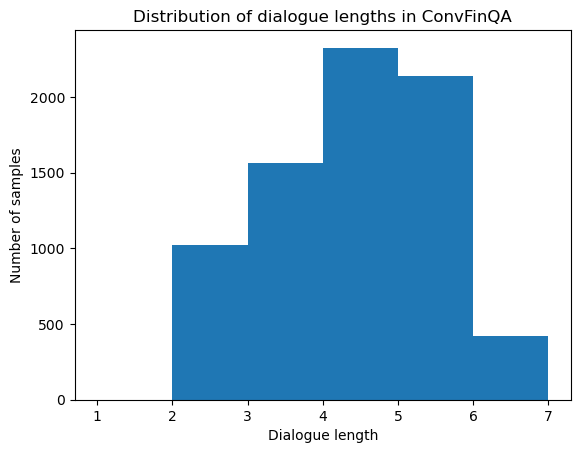

In [53]:
plt.hist([l for l in dialogue_lengths if l > 0], bins=range(1, max(dialogue_lengths)+2))
plt.xlabel("Dialogue length")
plt.ylabel("Number of samples")
plt.title("Distribution of dialogue lengths in ConvFinQA")
plt.show()

In [54]:
hist_phrases = {
    "what about", "what was the change", "how much higher",
    "the above", "that amount", "difference", "increase", "decrease"
}

def needs_history(turn, turn_index):
    # turn should be a dict with a "question" key
    q = turn.get("question", "").lower()
    return turn_index > 0 and any(p in q for p in hist_phrases)

keep_conv = []
for s in convinqa_processed:
    meta = s.get("meta", {})
    cur_dial = meta.get("cur_dial")
    turn_ind = meta.get("turn_ind", 0)
    # cur_dial should be a list of dicts, get the current turn if possible
    if isinstance(cur_dial, list) and len(cur_dial) > 0 and isinstance(cur_dial[0], dict):
        turn = cur_dial[0]
    else:
        turn = {"question": ""}
    if needs_history(turn, turn_ind):
        keep_conv.append(s)

print("History-dependent ConvFinQA turns:", len(keep_conv))

History-dependent ConvFinQA turns: 1032


In [55]:
valid_cur_dial = [
    isinstance(s.get("meta", {}).get("cur_dial"), list) and
    len(s["meta"]["cur_dial"]) > 0 and
    isinstance(s["meta"]["cur_dial"][0], dict)
    for s in convinqa_processed
]
print(f"Samples with valid cur_dial: {sum(valid_cur_dial)} / {len(convinqa_processed)}")

Samples with valid cur_dial: 7462 / 7462


In [58]:
print(convinqa_processed[0])
# print only cur_dial of convinqa_processed[0]
print(convinqa_processed[0]['meta']['turn_ind'])


{'qid': 'ConvFinQA_Single_JKHY/2009/page_28.pdf-3_0', 'dataset': 'ConvFinQA', 'question': 'what was the percentage change in the net cash from operating activities from 2008 to 2009', 'answer': '14.1%', 'context_text': ['26 | 2009 annual report in fiscal 2008 , revenues in the credit union systems and services business segment increased 14% ( 14 % ) from fiscal 2007 . all revenue components within the segment experienced growth during fiscal 2008 . license revenue generated the largest dollar growth in revenue as episys ae , our flagship core processing system aimed at larger credit unions , experienced strong sales throughout the year .', 'support and service revenue , which is the largest component of total revenues for the credit union segment , experienced 34 percent growth in eft support and 10 percent growth in in-house support . gross profit in this business segment increased $ 9344 in fiscal 2008 compared to fiscal 2007 , due primarily to the increase in license revenue , which

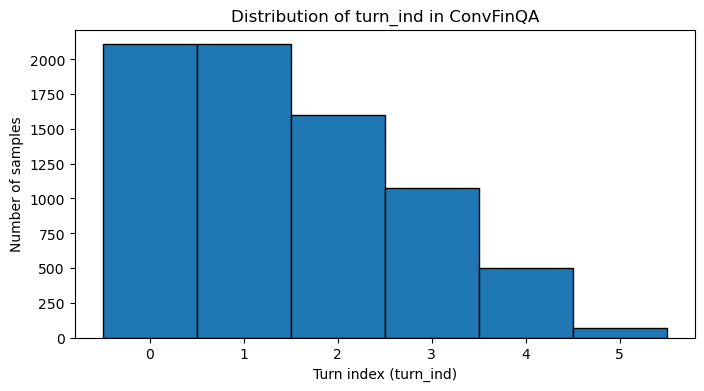

In [59]:
import matplotlib.pyplot as plt

# Extract turn_ind values, skipping samples where it's missing or None
turn_inds = [
    s["meta"].get("turn_ind")
    for s in convinqa_processed
    if s.get("meta") and s["meta"].get("turn_ind") is not None
]

plt.figure(figsize=(8, 4))
plt.hist(turn_inds, bins=range(min(turn_inds), max(turn_inds)+2), align='left', edgecolor='black')
plt.xlabel("Turn index (turn_ind)")
plt.ylabel("Number of samples")
plt.title("Distribution of turn_ind in ConvFinQA")
plt.xticks(range(min(turn_inds), max(turn_inds)+1))
plt.show()

In [60]:
sample = convinqa_processed[0]
chat_history = sample["meta"].get("dialogue_break", [])
print("Chat history for this sample:")
for i, turn in enumerate(chat_history):
    print(f"Turn {i}: {turn}")

Chat history for this sample:
Turn 0: what is the net cash from operating activities in 2009?
Turn 1: what about in 2008?
Turn 2: what is the difference?
Turn 3: what percentage change does this represent?


Turn 0 is always the first question in a dialogue — it's standalone and mirrors FinQA's format (single-shot). Since we're interested in assessing retriever performance under context-dependent conditions, keeping only turns > 0 directly aligns with our goal.
By filtering out turn 0, we’re removing duplication and enriching the dataset with dialogue-driven questions.

In [62]:
# Keep only samples with turn_ind > 0
convinqa_turn_history = [
    s for s in convinqa_processed
    if s.get("meta", {}).get("turn_ind") is not None and s["meta"]["turn_ind"] > 0
]

print(f"Samples with turn_ind > 0: {len(convinqa_turn_history)} / {len(convinqa_processed)}")

Samples with turn_ind > 0: 5353 / 7462


In [63]:
#save new convinqa dataset and overwrite the old one 
# Save ConvFinQA
with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/convinqa_processed.json", "w") as f:
    json.dump(convinqa_turn_history, f)

#### 2.3 Merge Datasets 

In [67]:
# Merge the datasets
merged_dataset = finqa_processed + convinqa_turn_history + finder_processed

print(f"Total merged samples: {len(merged_dataset)}")
# print shape of merged dataset
df = pd.DataFrame(merged_dataset)
print(df.shape)
print(df.columns)

Total merged samples: 17307
(17307, 11)
Index(['qid', 'dataset', 'question', 'answer', 'context_text', 'context_table',
       'reasoning', 'reason_type', 'gold_text_id', 'gold_table_row', 'meta'],
      dtype='object')


In [72]:
#count samples per dataset in merged dataset
print(df["dataset"].value_counts())

dataset
FinQA        6251
FinDER       5703
ConvFinQA    5353
Name: count, dtype: int64


In [73]:
print(df.isnull().sum())

qid               0
dataset           0
question          0
answer            0
context_text      0
context_table     0
reasoning         0
reason_type       0
gold_text_id      0
gold_table_row    0
meta              0
dtype: int64


In [74]:
print("Rows with any missing value:", df.isnull().any(axis=1).sum())

Rows with any missing value: 0


In [75]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows.head())

Empty DataFrame
Columns: [qid, dataset, question, answer, context_text, context_table, reasoning, reason_type, gold_text_id, gold_table_row, meta]
Index: []


In [76]:
print("Missing in 'answer':", df['answer'].isnull().sum())

Missing in 'answer': 0


In [77]:
print((df == None).sum())

qid               0
dataset           0
question          0
answer            0
context_text      0
context_table     0
reasoning         0
reason_type       0
gold_text_id      0
gold_table_row    0
meta              0
dtype: int64


In [78]:
with open("/Users/christel/Desktop/Thesis/thesis_repo/data/data_processed/merged_dataset.json", "w") as f:
    json.dump(merged_dataset, f)